In [2]:
import pandas as pd
import numpy as np

/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('extended_training_data.csv', sep=',')

In [4]:
df_filtered = df.drop(columns=['gene', 'peak', 'start','end','sum','mean','variance'])

In [5]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_filtered

le = LabelEncoder()
df_encoded['chr'] = le.fit_transform(df_filtered['chromosome'])
df_encoded['peak_cluster'] = le.fit_transform(df_filtered['gmm_bin'])
df_encoded = df_encoded.drop(columns=['chromosome','gmm_bin'])
print(df_encoded.head())

          0         1         2         3         4         5         6  \
0 -0.164268 -0.142232  0.255530  0.126902  0.064934  0.140393 -0.518712   
1 -0.484731 -0.212172  0.147270  0.142966  0.922999  0.138138 -0.571259   
2 -0.108029  0.028538 -0.152415  0.089255  0.098867  0.346167 -0.304413   
3 -0.031849  0.155310 -0.426338  0.207680  0.316454 -0.089159 -0.347616   
4 -0.078769  0.021574 -0.066757  0.037969  0.108880  0.201862 -0.362171   

   length  norm_mean  norm_sum  Peak2Gene  chr  peak_cluster  
0    4672   0.528583  0.244007       True    0             7  
1    5776   0.581402  0.358899       True   18             0  
2    3167   0.577557  0.627723       True   18             6  
3   22371   0.834910  0.905905       True    0             1  
4   13967   0.637335  0.264982       True   11             7  


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [8]:
X = df_encoded.drop('Peak2Gene', axis=1)
y = df_encoded['Peak2Gene']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Report:\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.75
Logistic Regression Report:
               precision    recall  f1-score   support

       False       0.71      0.87      0.78        31
        True       0.82      0.62      0.71        29

    accuracy                           0.75        60
   macro avg       0.76      0.75      0.74        60
weighted avg       0.76      0.75      0.75        60



/Users/zs_jin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test)


print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 4860 candidates, totalling 14580 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_

/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.8; tota

/Users/zs_jin/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.

/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsa

/Users/zs_jin/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


/Users/zs_jin/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:11:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


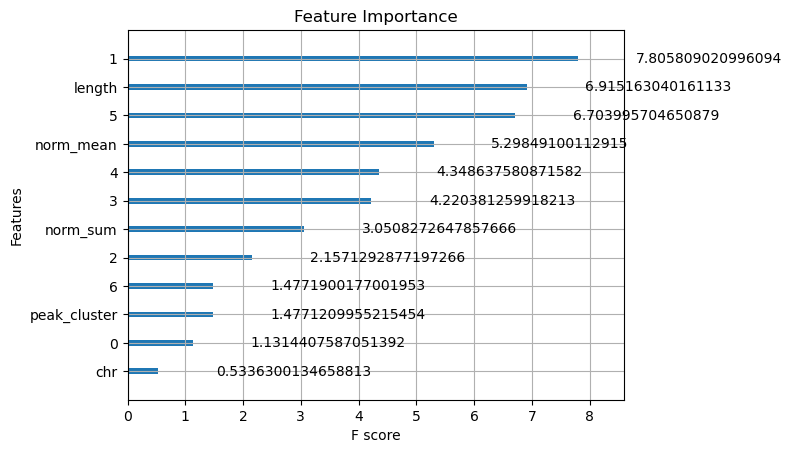

In [19]:
import xgboost as xgb
import matplotlib.pyplot as plt
# Define the model parameters
params = {
    'colsample_bytree': 0.8,
    'gamma': 0,
    'learning_rate': 0.3,
    'max_depth': 7,
    'min_child_weight': 1,
    'n_estimators': 300,
    'subsample': 0.7,
    'objective': 'binary:logistic',  # Assuming a binary classification problem
    'eval_metric': 'auc'             # Assuming AUC is the desired metric
}

# Prepare your data here (X_train, y_train)
# X_train and y_train should be your training data features and labels, respectively

# Create DMatrix object
dtrain = xgb.DMatrix(X_train, label=y_train)

# Train the model
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=10)

importance = xgb_model.get_score(importance_type='gain')  # You can change to 'weight' or 'cover'

# Plot feature importance
xgb.plot_importance(importance)
plt.title('Feature Importance')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced'],
    'degree': [2, 3, 4]
}

svc = SVC(random_state=42)


grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)


grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_svc = grid_search.best_estimator_


y_pred = best_svc.predict(X_test_scaled)


print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, cl

/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[CV] END C=1, class_weight=None, degree=2, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=4, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=4, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, class_w

In [12]:
import keras
from keras import layers, models, optimizers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
def create_model(neurons=64, layers=1, dropout_rate=0.2, learning_rate=0.001):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train.shape[1],)))  # Add Input layer explicitly
    model.add(keras.layers.Dense(neurons, activation='relu'))
    model.add(keras.layers.Dropout(dropout_rate))
    
    for _ in range(layers - 1):
        model.add(keras.layers.Dense(neurons, activation='relu'))
        model.add(keras.layers.Dropout(dropout_rate))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create a KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'model__neurons': [32, 64, 128],
    'model__layers': [1, 2, 3],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print the model's performance
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=128, epochs=50, model__dropout_rate=0.1, model__layers=3, model__learning_rate=0.001, model__neurons=128; total time=   1.9s
[CV] END batch_size=64, epochs=50, model__dropout_rate=0.1, model__layers=3, model__learning_rate=0.001, model__neurons=128; total time=   2.1s
[CV] END batch_size=128, epochs=50, model__dropout_rate=0.1, model__layers=3, model__learning_rate=0.001, model__neurons=128; total time=   2.2s


/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[CV] END batch_size=128, epochs=100, model__dropout_rate=0.1, model__layers=3, model__learning_rate=0.001, model__neurons=128; total time=   3.0s
[CV] END batch_size=64, epochs=100, model__dropout_rate=0.1, model__layers=3, model__learning_rate=0.001, model__neurons=128; total time=   3.1s
[CV] END batch_size=64, epochs=100, model__dropout_rate=0.1, model__layers=3, model__learning_rate=0.001, model__neurons=128; total time=   3.2s
[CV] END batch_size=128, epochs=100, model__dropout_rate=0.1, model__layers=3, model__learning_rate=0.001, model__neurons=128; total time=   2.2s
[CV] END batch_size=128, epochs=100, model__dropout_rate=0.1, model__layers=3, model__learning_rate=0.001, model__neurons=128; total time=   2.2s
[CV] END batch_size=128, epochs=50, model__dropout_rate=0.1, model__layers=3, model__learning_rate=0.001, model__neurons=128; total time=   1.4s
[CV] END batch_size=64, epochs=50, model__dropout_rate=0.1, model__layers=3, model__learning_rate=0.001, model__neurons=128; to

In [22]:
def create_best_model(neurons=128, layers=3, dropout_rate=0.1, learning_rate=0.001):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train.shape[1],)))  # Adjust the input shape based on your features
    model.add(keras.layers.Dense(neurons, activation='relu'))
    model.add(keras.layers.Dropout(dropout_rate))
    
    for _ in range(layers - 1):  # Adding additional layers as per the optimal parameters
        model.add(keras.layers.Dense(neurons, activation='relu'))
        model.add(keras.layers.Dropout(dropout_rate))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Assuming binary classification
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [23]:
best_model = create_best_model()

best_model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5733 - loss: 0.6913  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6335 - loss: 0.6476 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6497 - loss: 0.6044 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.5605 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7559 - loss: 0.5382 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8311 - loss: 0.5001 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8016 - loss: 0.4661 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8345 - loss: 0.4469 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8292 - loss: 0.4133 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8184 - loss: 0.4078 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8561 - loss: 0.3742 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8505 - loss: 0.3541 


In [24]:
best_model.save('NN_model.h5')